In [1]:
import pandas as pd

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [4]:
df = pd.read_csv("students_score_cleaned.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,2,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [17]:
#a)
meanMaths = df["MathScore"].mean()
meanReading = df["ReadingScore"].mean()
meanWriting = df["WritingScore"].mean()

print("Mean Maths Score: ", meanMaths)
print("Mean Reading Score: ", meanReading)
print("Mean Writing Score: ", meanWriting)

#b)
maleMean = df.loc[df["Gender_male"] == 1].mean()
femaleMean = df.loc[df["Gender_female"] == 1].mean()

print("Mean male scores: ", maleMean["MathScore"], maleMean["ReadingScore"], maleMean["WritingScore"])
print("Mean female scores: ", femaleMean["MathScore"], femaleMean["ReadingScore"], femaleMean["WritingScore"])

#c)
import statistics
print("Coefficient of variation for Maths: ", statistics.stdev(df["MathScore"]) / meanMaths)
print("Coefficient of variation for Reading: ", statistics.stdev(df["ReadingScore"]) / meanReading)
print("Coefficient of variation for Writing: ", statistics.stdev(df["WritingScore"]) / meanWriting)


Mean Maths Score:  66.55994779681973
Mean Reading Score:  69.39008139574818
Mean Writing Score:  68.42933681354535
Mean male scores:  69.03848816281324 65.82465734459366 63.88986570677004
Mean female scores:  64.11941926249062 72.900824756322 72.89918887601391
Coefficient of variation for Maths:  0.23053282736702593
Coefficient of variation for Reading:  0.2127132583474032
Coefficient of variation for Writing:  0.22574844991058549


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [19]:
#statistical test
import scipy.stats as stats
print(stats.ttest_ind(df.loc[df["Gender_male"] == 1]["MathScore"], df.loc[df["Gender_female"] == 1]["MathScore"]))

Ttest_indResult(statistic=27.70843426303627, pvalue=8.09604172877808e-167)


**We reject the hypothesis**

4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [21]:
#ANOVA test for writing scores of male and female
import scipy.stats as stats

male_scores = df.loc[df["Gender_male"] == 1]["WritingScore"]
female_scores = df.loc[df["Gender_female"] == 1]["WritingScore"]

f_statistic, p_value = stats.f_oneway(male_scores, female_scores)

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)



ANOVA F-statistic: 2705.7625977133325
ANOVA p-value: 0.0


**Gender DID affect the writing scores**

5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# two-way ANOVA
model = ols('Gender_female ~ MathScore + WritingScore + ReadingScore', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                   sum_sq       df             F        PR(>F)
MathScore     3177.766909      1.0  27468.214716  0.000000e+00
WritingScore   707.227644      1.0   6113.186188  0.000000e+00
ReadingScore    25.209512      1.0    217.907825  3.895583e-49
Residual      3368.050271  29113.0           NaN           NaN


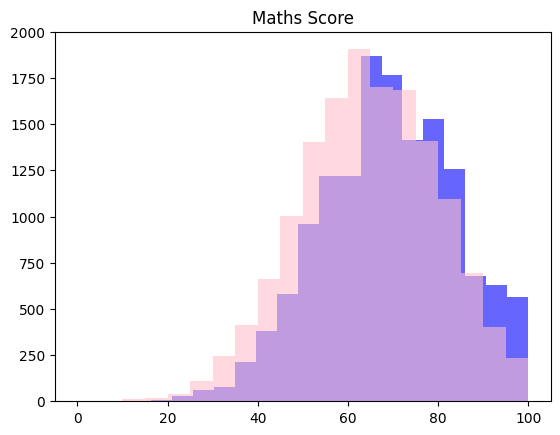

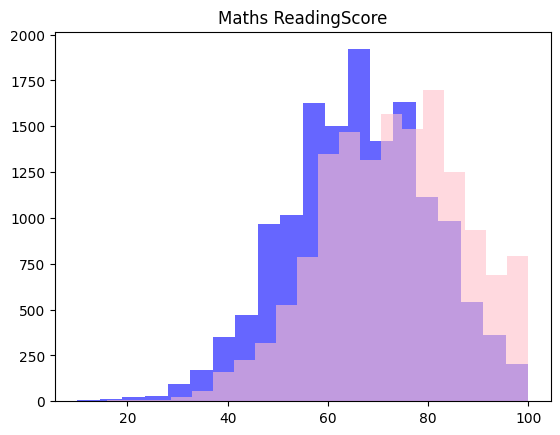

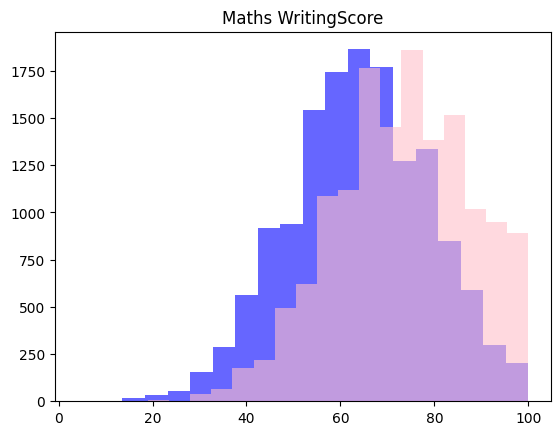

In [71]:
import matplotlib.pyplot as plt
male_scores = df[df["Gender_male"] == 1]
female_scores = df[df["Gender_female"] == 1]

plt.hist(male_scores["MathScore"], color="blue", alpha = 0.6, bins=20)
plt.hist(female_scores["MathScore"], color="pink", alpha=0.6, bins=20)
plt.title("Maths Score")
plt.show()

plt.hist(male_scores["ReadingScore"], color="blue", alpha = 0.6, bins=20)
plt.hist(female_scores["ReadingScore"], color="pink", alpha=0.6, bins=20)
plt.title("Maths ReadingScore")
plt.show()

plt.hist(male_scores["WritingScore"], color="blue", alpha = 0.6, bins=20)
plt.hist(female_scores["WritingScore"], color="pink", alpha=0.6, bins=20)
plt.title("Maths WritingScore")
plt.show()
